In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Import the CSV from R/multinichenet annotataion
prioritization_data = pd.read_csv('../new_man_tables/multinichenet_prioritization_table_231004.csv')
max_interaction = prioritization_data.groupby(['sender', 'receiver']).size().max()
max_interaction


2864

In [2]:
# If you had to rename cell types in R (Replace periods with spaces in the cell type names)
prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')

sns.set(font_scale=2.8)

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_87963/2461659727.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_87963/2461659727.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')


In [ ]:
markers = {'T-cell': 'CD3D', 'B-cell': 'CD79A', 'myeloid': 'CST3'}
sc.pl.dotplot(adata, markers, groupby='bulk_labels', dendrogram=True)

In [66]:


def plot_heatmap_with_circles_border_legend_and_cbar(matrix,target_cells, ax, title, cm='Reds'):
    sns.heatmap(matrix, cmap=cm, annot=False, fmt='d', ax=ax, cbar=True, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Number of Interactions'})
    ax.set_aspect('equal')
    
    # Add a rectangle around the heatmap (if desired)
    rect = plt.Rectangle((0,0), matrix.shape[1], matrix.shape[0], linewidth=2.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    
    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            value = matrix.iloc[y, x]
            if value > 0:
                size = (value / matrix.values.max()) * 0.4
                ax.add_patch(plt.Circle((x + 0.5, y + 0.5), size, color='black', alpha=1.0,edgecolor='white' ))
          # Adding dashed vertical lines after each cell type group (for both "Naïve" and "IgG")
    for x in range(0, matrix.shape[1], 2):  # Every second column
        ax.axvline(x + 2, color='k', linestyle='--', linewidth=2)
    for x in range(0, matrix.shape[1], 1):  # Every row  
        ax.axhline(x, color='grey', linestyle='-', linewidth=1.5,alpha=.3)
        
   # Highlighting the top 5 interactions for each group with red boxes (change name of group when running function bc i hard coded it)
    for start_col_idx, start_col_name in enumerate(["Negative - ", "PreviousTB - "]):
        subset = matrix.loc[:, matrix.columns.str.startswith(start_col_name)]
        top_interactions = subset.stack().nlargest(5)
        for (y_str, col_name) in top_interactions.index:
            y = matrix.index.get_loc(y_str)
            col_index = matrix.columns.get_loc(col_name)
            ax.add_patch(plt.Rectangle((col_index, y), 1, 1, fill=False, edgecolor='black', lw=1))
#     for y_str in target_cells:
#         for x_str in matrix.columns:
#             if y_str in x_str:
#                 print(y_str)
#                 print(x_str)
#                 y = matrix.index.get_loc(y_str)
#                 col_index = matrix.columns.get_loc(x_str)
                
#                 if matrix.iloc[y,col_index]>0:
#                     print((col_index, y))
#                     ax.add_patch(plt.Rectangle((col_index, y), 1, 1, fill=False, edgecolor='purple', lw=3))
            
    ax.set_title(title)
    ax.set_xlabel('Group - Receiver Cell Type')
    ax.set_ylabel('Sender Cell Type')
    
    


def plot_heatmap_oneCond(matrix,target_cells, ax, title, cm, max_value):
    sns.heatmap(matrix, cmap=cm, annot=False, fmt='d',vmax=max_value, ax=ax, cbar=True, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Number of Interactions'})
    
    ax.set_aspect('equal')
    
    # Add a rectangle around the heatmap (if desired)
    rect = plt.Rectangle((0,0), matrix.shape[1], matrix.shape[0], linewidth=2.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    
    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            value = matrix.iloc[y, x]
            if value > 0:
                size = (value / max_value) * 0.4  
                ax.add_patch(plt.Circle((x + 0.5, y + 0.5), size, color='black', alpha=1.0,edgecolor='white' ))
          # Adding dashed vertical lines after each cell type group (for both "Naïve" and "IgG")
    for x in range(0, matrix.shape[1], 1):  # Every column
        ax.axvline(x, color='k', linestyle='--', linewidth=2)
    for x in range(0, matrix.shape[0], 1):  # Every row  
        ax.axhline(x, color='grey', linestyle='-', linewidth=1.5,alpha=.3)
        
   # Highlighting the top 5 interactions for each group with red boxes (
    top_interactions=matrix.stack().nlargest(5)
    for (y_str, col_name) in top_interactions.index:
        y = matrix.index.get_loc(y_str)
        col_index = matrix.columns.get_loc(col_name)
        ax.add_patch(plt.Rectangle((col_index, y), 1, 1, fill=False, edgecolor='black', lw=2))

     
    ax.set_title(title)
    ax.set_xlabel('Group - Receiver Cell Type')
    ax.set_ylabel('Sender Cell Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', )

# select only top 200 interactions

In [3]:
prioritization_data=prioritization_data.loc[~prioritization_data['prioritization_score'].isnull()]

In [7]:
prioritization_data.loc[prioritization_data.group=='PreviousTB', 'sender'].unique()

array(['Fibroblast', 'Macrophage', 'Endothelial', 'DC', 'Monocyte',
       'Plasma', 'Neutrophil', 'CD8 cytotoxic T', 'Mast', 'T',
       'Club cells', 'AT2', 'B cell', 'AT1'], dtype=object)

In [10]:
prioritization_data.loc[(prioritization_data.group=='PreviousTB')&(prioritization_data.sender=='T'), :]

,Unnamed: 0,contrast,group,sender,receiver,ligand,receptor,lfc_ligand,lfc_receptor,ligand_receptor_lfc_avg,...,scaled_pb_ligand,scaled_avg_exprs_receptor,scaled_avg_frq_receptor,pb_receptor_group,scaled_pb_receptor,fraction_expressing_ligand_receptor,max_scaled_activity,na.rm,prioritization_score,top_group
3170,3171,PreviousTB-Negative,PreviousTB,T,CD8 cytotoxic T,CLEC2D,KLRB1,0.359,0.298,0.3285,...,0.735896,0.615353,NaN,7.094715,0.789652,0.666667,1.001000,True,0.770719,PreviousTB
3171,3172,PreviousTB-Negative,PreviousTB,T,CD8 cytotoxic T,CLEC2D,KLRB1,0.359,0.298,0.3285,...,0.735896,0.615353,NaN,7.094715,0.789652,0.666667,1.001000,True,0.770719,PreviousTB
4862,4863,PreviousTB-Negative,PreviousTB,T,Monocyte,FURIN,ADAM19,1.260,1.820,1.5400,...,1.001000,0.368749,0.414649,5.173202,0.756811,0.444444,0.225053,True,0.746856,PreviousTB
4863,4864,PreviousTB-Negative,PreviousTB,T,Monocyte,FURIN,ADAM19,1.260,1.820,1.5400,...,1.001000,0.368749,0.414649,5.173202,0.756811,0.444444,0.225053,True,0.746856,PreviousTB
7794,7795,PreviousTB-Negative,PreviousTB,T,Endothelial,NAMPT,ITGA5,1.010,1.760,1.3850,...,0.367573,1.001000,1.001000,7.193540,0.990483,0.555556,0.432045,True,0.712182,PreviousTB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45857,45858,PreviousTB-Negative,PreviousTB,T,CD8 cytotoxic T,HLA.DRA,CD4,-0.913,-0.503,-0.7080,...,0.183958,0.076800,NaN,4.023982,0.473846,0.333333,0.433822,True,0.291765,Negative
46390,46391,PreviousTB-Negative,PreviousTB,T,Plasma,HLA.DRA,CD81,-0.913,-1.840,-1.3765,...,0.183958,0.239512,0.303690,6.835847,0.399520,0.666667,0.406767,True,0.260124,PreviousTB
46391,46392,PreviousTB-Negative,PreviousTB,T,Plasma,HLA.DRA,CD81,-0.913,-1.840,-1.3765,...,0.183958,0.239512,0.303690,6.835847,0.399520,0.666667,0.406767,True,0.260124,PreviousTB
46672,46673,PreviousTB-Negative,PreviousTB,T,Monocyte,HLA.DRA,CD9,-0.913,-2.430,-1.6715,...,0.183958,0.116127,0.120477,4.446958,0.427442,0.333333,0.402145,True,0.232223,Negative


In [24]:
prioritization_score_cutoff=prioritization_data['prioritization_score'].sort_values()[199]

In [25]:
prioritization_data_selected=prioritization_data.loc[prioritization_data['prioritization_score']>=prioritization_score_cutoff]

In [20]:
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['#FFFFFF', 'red' ]  # White to Red

# Define the corresponding values for the colors (0 to 1)
values = [0, 1]

# Create the colormap using LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(values, colors)))

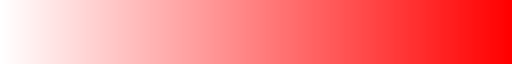

In [21]:
custom_cmap

In [28]:

cm=custom_cmap
# reorder columns for side-by-side comparison
interaction_matrix_tb = prioritization_data_selected[prioritization_data_selected['group'] == 'PreviousTB'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)
interaction_matrix_neg = prioritization_data_selected[prioritization_data_selected['group'] == 'Negative'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)
interaction_matrix_tb, interaction_matrix_neg = interaction_matrix_tb.align(interaction_matrix_neg, fill_value=0)


In [29]:
interaction_matrix_tb

receiver,AT2,CD8 cytotoxic T,DC,Endothelial,Fibroblast,Macrophage,Mast,Monocyte,Neutrophil,T
sender,,,,,,,,,,
AT1,0,0,0,0,0,0,0,0,0,0
AT2,0,0,0,0,0,0,0,0,0,0
CD8 cytotoxic T,0,0,0,0,0,0,0,0,0,0
DC,0,0,0,2,0,0,0,0,0,4
Endothelial,0,0,0,6,14,4,0,2,0,0
Fibroblast,0,0,2,6,42,12,0,10,0,0
Macrophage,0,0,0,0,8,4,0,4,0,0
Mast,0,0,0,0,0,0,0,0,0,0
Monocyte,0,0,0,2,4,0,0,2,0,0


In [30]:
interaction_matrix_neg

receiver,AT2,CD8 cytotoxic T,DC,Endothelial,Fibroblast,Macrophage,Mast,Monocyte,Neutrophil,T
sender,,,,,,,,,,
AT1,0,0,0,0,2,0,0,0,0,0
AT2,0,0,0,0,0,0,0,0,4,0
CD8 cytotoxic T,0,6,4,0,0,0,0,0,0,4
DC,0,0,2,0,0,0,0,0,0,0
Endothelial,0,0,0,0,0,0,0,0,0,0
Fibroblast,0,0,0,0,0,2,0,0,0,0
Macrophage,0,2,0,0,2,2,0,2,4,0
Mast,0,0,2,0,0,0,0,4,0,0
Monocyte,0,2,2,0,2,2,0,2,4,0


/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_70243/2022414609.py:62: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Circle((x + 0.5, y + 0.5), size, color='black', alpha=1.0,edgecolor='white' ))
/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_70243/2022414609.py:62: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Circle((x + 0.5, y + 0.5), size, color='black', alpha=1.0,edgecolor='white' ))


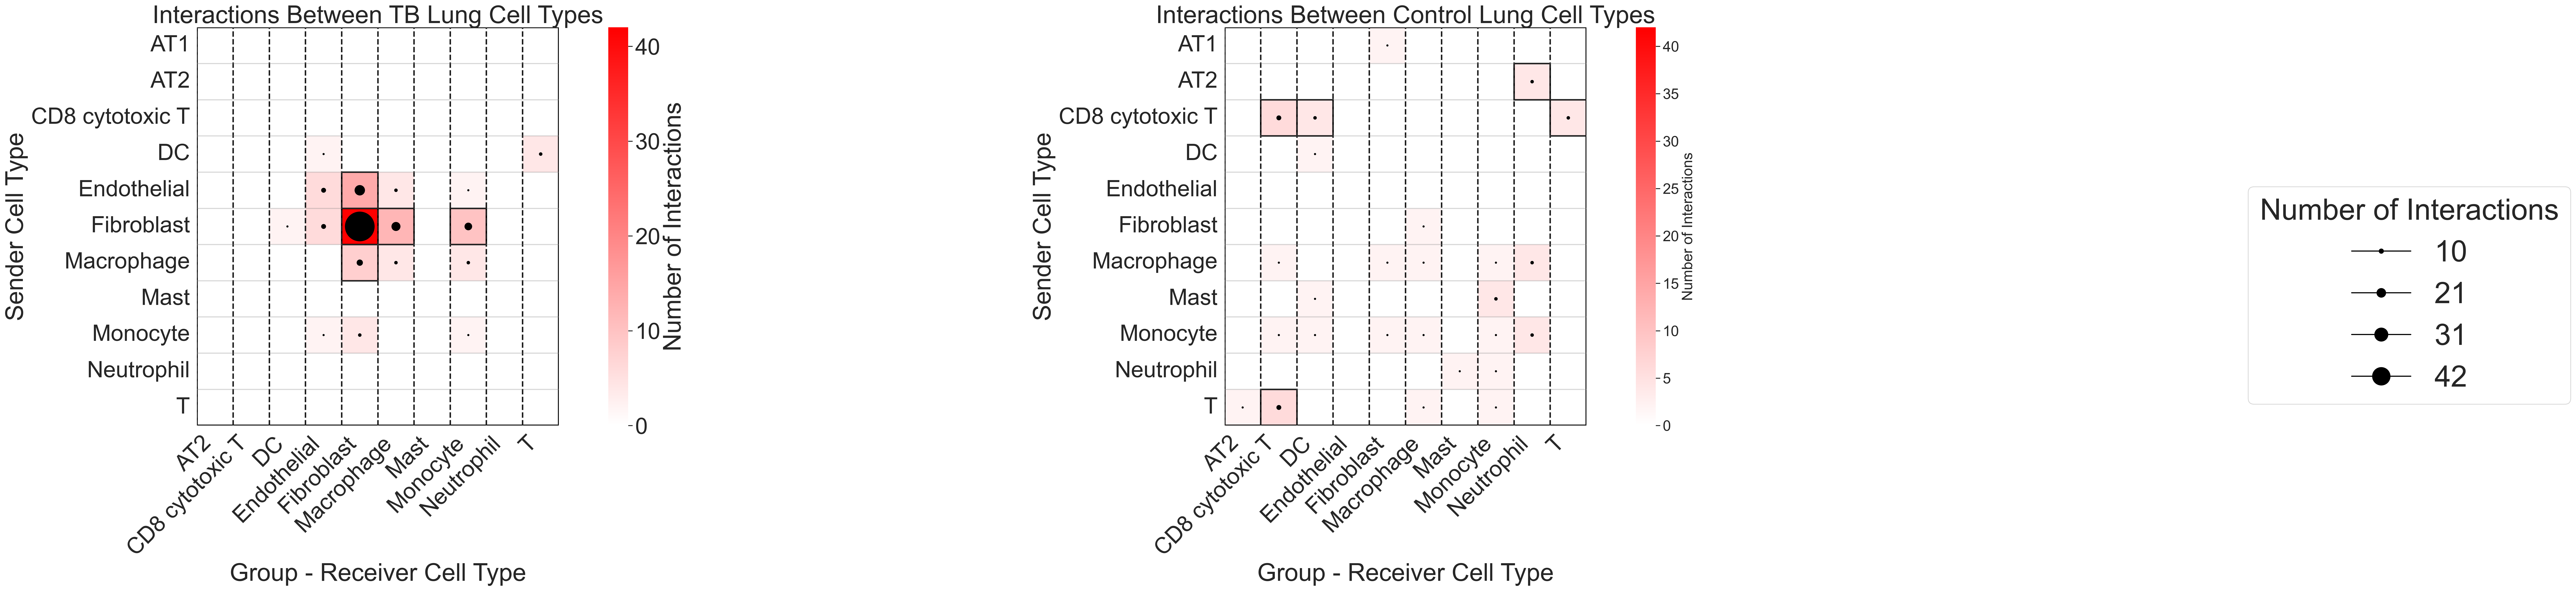

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 12), dpi=300)
target_cell=[]
max_value = prioritization_data_selected.groupby(['sender', 'receiver']).size().max()
plot_heatmap_oneCond(interaction_matrix_tb,target_cell, ax[0], 'Interactions Between TB Lung Cell Types',cm, max_value)

plot_heatmap_oneCond(interaction_matrix_neg,target_cell, ax[1], 'Interactions Between Control Lung Cell Types',cm, max_value)

# Adjust legend params
circle_sizes = [0.1, 0.2, 0.3, 0.4]

legend_labels = [int(size * max_value / 0.4) for size in circle_sizes]
legend_handles = [plt.Line2D([0], [0], marker='o', color='black', label=f'{label}', markersize=size*60) for size, label in zip(circle_sizes, legend_labels)]
fig.legend(handles=legend_handles, title='Number of Interactions', bbox_to_anchor=(1.2, 0.5), loc='center left', fontsize='large', title_fontsize='large',facecolor='white')

cbar = ax[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.set_label(cbar.ax.get_ylabel(), fontsize=20)



plt.tight_layout()
plt.savefig('../new_man_figs/Fig4/multinichenet_heatmap_top200Interactions_sidebyside.pdf', bbox_inches='tight')
plt.show()
plt.close()
